# Modeling evolutionary problems

One of the ways in which mathematics is used to translate experimental
measurements into an understanding of the underlying regulating mechanisms is
represented by **ordinary differential equations**. Indeed if we consider the
values of variables these do not provide themselves insight on the underlying
phenomena we want to describe. The fundamental insight is that is *the change
in the magnitude* of a variable *as a function of time* that is the important
quantity. These changes can be often be described in terms of differential
equations.

The first class of problems we will address in this course is then their
numerical solution with MATLAB. To arrive at this we will start by (quickly)
recalling the mathematical background.

## Ordinary differential equations

Let us suppose that we have a variable $x$ that depends on time $t$, we can
represent its evolution on a graph
```{image} images/differentiation.png
:alt: Differentiation
:width: 400px
:align: center
```
There are intervals during which $x$ increases and others during which it
decreases. We can denote the **slope** of the change as
```{math}
\frac{\Delta x}{\Delta t} = \frac{x(t_2) - x(t_1)}{t_2 - t_1} =
\frac{x(t_1 + \Delta t) - x(t_1)}{\Delta t}, \quad \Delta t = t_2 - t_1,
```
when we define it in this way, the *slope* is a function of the selected
interval.  We are the interested in what happens as we let the time interval
decrease by approaching zero, i.e., $\Delta t \rightarrow 0$,
```{math}
\lim_{\Delta t \rightarrow 0}\frac{\Delta x}{\Delta t} =
\lim_{\Delta t \rightarrow 0} \frac{x(t_1 + \Delta t) - x(t_1)}{\Delta t}
= x'(t) = \frac{ {\rm d} x }{{\rm d} t} = \dot{x}(t),
```
that is, we are interested in its **derivative**. Specifically, we are
interested in making **predictions** about phenomena that are
subject to change, e.g.,
- the rate at which the food supply for a given specie is related to the growth
of its population,
- the variation of a drug concentration in an organ,
- the rate of decay of a radioactive substance.

Thus we are particularly interested in equations that tell us how
this rate at which a given quantity changes when it is related to some
function of the quantity itself. In mathematical terms these are equations
of the form
```{math}
x'(t) = f(t,x(t)), \quad t \in [t_0,t_f].
```
These type of equations are called **ordinary differential equations**. Their
solution cannot be determined uniquely without employing some
**outside condition**. This is typically an *initial value*, e.g., the quantity
of radioactive material at the beginning of the decay or the number of members
of our population.

There is a very rich mathematical theory behind these objects that is involved
in
1. having strategies useful for the development of models of physical phenomena;
2. discovering whether the model we (or our *friendly neighborhood
  mathematician* ) have just devised is **well-posed** ( are there solutions?
    are these unique? do the solutions correspond to the phenomenon we were
    modeling?);

**But don't worry**, what we are interested in here is using MATLAB to
investigate them, and approximate their solution 👍. So we will assume that you
have got your ODE from a good dealer, and avoid investigating the theory.

We will start from **an example** doing the whole analysis from top to bottom,
then you will have the opportunity to work on a **gallery of problems** testing
what we have learned.

## A completely worked out example

The model we want to study is an of example of **compartment analysis** related
to the time evolution of a drug concentration in an organ. We let now $x(t)$
denote the amount of substance in some compartment at time $t$. We can then
compute the change in the quantity $x(t)$ in terms of the amount of
the quantity flowing into and out the compartment, i.e., we are assuming that
the substance does not "disappear" in the process,
```{math}
\frac{{\rm d} x(t)}{{\rm d}t} = \text{input rate}\;-\text{output rate},
```
this principle is based on the **law of conservation of mass** and is known as
the *Balance Law*.

The first example we look at is a simple process of drug administration through
the stomach and the blood
```{image} images/drug1.png
:alt: A simple drug absorption system
:width: 400px
:align: center
```
We enter in the system $y_0$ unit of drugs (*initial condition*), then the
quantity of drug that is in the stomach (*first compartment*) is denoted by
$y_1(t)$. From here it can only go to the blood (*second compartment*) with
a transition rate of $k_1$. We denote with $y_2(t)$ the quantity of drug in
the second compartment, from here then the drug is eliminated through some
metabolic process at rate $k_e$. Let us write down the differential model
for this case
```{math}
\begin{cases}
\dot{y}_1(t) = - k_1 y_1(t), & y_1(0) = y_0, \\
\dot{y}_2(t) = + k_1 y_1(t) - k_e y_2(t), & y_2(0) = 0,
\end{cases} \quad t \in [0,t_f],
```
we have written down a system of two differential equations for the quantity of
drug in the two compartments.

We now use MATLAB to get a **numerical solution** of this system. In this case
a numerical solution is nothing more than an evaluation of the two functions
$y_1(t)$, and $y_2(t)$ over a grid of time values
```{math}
0 = t_1 < t_2 < \ldots < t_n = t_f.
```

Let us start by creating a `matlab script` called `drugdelivery.m`.
```{code-block} matlab
%% Drug Delivery
% This script will be used to solve a simple drug-delivery model in the form
% of two linear coupled odes

clear; clc; close all; % Clean the memory
```
In MATLAB you can specify any number of coupled ODE equations to solve, and
at least in principle the number of equations is only limited by the available
computer memory. In our case we can specify our *dynamics* by using a `function
handle`, by adding to the previous script
```{code-block} matlab
k1 = 0.9776;      % Transition rate between stomach and blood
ke = 0.2213;      % Eliminatio rate from the blood
A = [ -k1 0; k1 -ke]; % Two by two matrix
f = @(t,y) A*y;   % Right-hand side of the ODE
```
We have firs fixed the values of the two constants for the model. Then we
have rewritten the right-hand side of the model as a matrix vector product
```{math}
\dot{
\begin{bmatrix}
y_1(t)\\y_2(t)
\end{bmatrix}} = \begin{bmatrix}
-k_1 & 0 \\
+k_1 & -k_e
\end{bmatrix}\begin{bmatrix}
y_1(t)\\y_2(t)
\end{bmatrix} \Leftrightarrow \dot{\mathbf{y}} = A \mathbf{y} = f(t,\mathbf{y}).
```
in a `function handle` form. That is, we can call `f(t,y)` to evaluate the
dynamics.
```{warning}
The dynamics of the system must always be expressed with the arguments in this
order: first the independent variable ($t$), then the function ($\mathbf{y}$).
MATLAB expects it to be this way!
```
The other two data from the system that we need are the *initial condition*,
and the maximum time $t_f$. We can add them to the script by doing
```{code-block} matlab
y0 = [600;0]; % firt component is the initial condition for y1, the second for y2
t0 = 0;
tf = 6;
```
Now we have specified all the needed data and we can use one of the MATLAB
**ODE integrator** to solve the system
```{code-block} matlab
[T,Y] = ode45(@(t,y) f(t,y),[t0,tf],y0);
```
After this call had been executed the variable `T` will contain the values
```{math}
0 = t_1 < t_2 < \ldots < t_n = t_f
```
on which we have approximated the solution, while $Y$ will be a
$\operatorname{lenght}(T) \times 2$ matrix containing the approximation of the
two solutions on each time step. We can visualize what we have obtained by
doing
```{code-block} matlab
figure(1)
plot(T,Y(:,1),'r-')
xlabel('T (h)')
ylabel('y_1(t)')
figure(2)
plot(T,Y(:,2),'r-')
xlabel('T (h)')
ylabel('y_2(t)')
```
and obtaining the two figures
````{list-table} Simple drug delivery solutions
:header-rows: 1

* - Compartment 1, stomach: $y_1(t)$
  - Compartment 2, blood: $y_2(t)$
* - ![](images/drug1-res1.png)
  - ![](images/drug1-res2.png)
````
From which we observe somehow the expected behavior. The quantity of drug in
the stomach (first compartment on the left) decreases with the time, while the
quantity in the bloodstream starts (second compartment on the right) to
increase, but since it is also eliminated from there with rate $k_e$ it shows
that hump.

```{tip}
`ode45` performs well with *most* ODE problems and should generally be your
first choice of solver. However, `ode23`, `ode78`, `ode89` and `ode113` can
be more efficient than `ode45` for problems with looser or tighter accuracy
requirements.

Some ODE problems exhibit **stiffness**. Stiffness is a term that defies a
precise definition, but in general, stiffness occurs when there is a
difference in scaling somewhere in the problem. For example, if an ODE has
two solution components that vary on drastically different time scales,
then the equation might be stiff. You can **identify a problem as stiff** if
*nonstiff* solvers (such as `ode45`) are unable to solve the problem or are
extremely slow. If you observe that a nonstiff solver is very slow, try using
a stiff solver such as `ode15s` instead.
```

Let us **summarize** the different steps we need for a program solving an ODE
(a system of ODEs),
1. we *implement* in either a *function* or a *function handle* the **dynamics of
the system**;
2. we create a vector containing the **initial condition**;
3. we fix the time interval `[t0,tf]` on which we want to solve our problem;
4. we call an ODE solver (typically `ode45` or `ode15s`) using all these data.

:::{admonition} Remark
Instead of just `[t0,tf]` we could pass to the integrator the whole vector of
time steps we want to use. A canonical way for doing so is, e.g., by generating
a linearly spaced vector such has
```{code-block} matlab
T = linspace(t0,tf,100);
```
This can be useful if we want the (approximate) solution to be evaluated at
certain time steps.

If we are uncertain at the beginning on what time steps we may be interested
MATLAB offers us a routine to query the solution at any point between `[t0,tf]`.
To use it we need to slightly change the way in which we call the ODE solver:
```{code-block} matlab
sol = ode45(@(t,y) f(t,y),[t0,tf],y0);
```
Now `sol` will be a `struct` variable, in the case of this example:
```bash
sol =

  struct with fields:

     solver: 'ode45'
    extdata: [1×1 struct]
          x: [1×20 double]
          y: [2×20 double]
      stats: [1×1 struct]
      idata: [1×1 struct]
```
The information that was contained before in the `T` vector is in `sol.x`, while
what we had stored in the `Y` matrix is in `sol.y`.

Now let us say that we want to know the quantity of the drug in the bloodstream
after 2 hours, we find it by doing
```{code-block} matlab
drug_in_blood = deval(sol,2,2);
```
The function `deval` we have used takes as a first argument the `struct` coming
from the ODE solver, as second the point $t \in [t_0,t_f]$ on which we want
the solution, and as last argument what component of the solution we want.
In this case we have queried for the vale in the second *compartment*.
:::

To see if we have understood how to work with this type of models you can try
and solve the following variations on the theme, that have either different
interactions, or a larger number of *compartments*.

::::{exercise} Drug administration through blood and tissue
In this model, there are again only two *compartments*. The first one is the
bloodstream into which the drug is injected and the second one is the tissue
where the drug has the desired effect. The blood takes a part
of drug at the rate of $k_b$ onto tissue while a fraction of it gets
eliminated from the stream with elimination rate of $k_e$.
```{image} images/drug2.png
:alt: Drug administration through blood and tissue
:width: 400px
:align: center
```
1. Write down the set of two differential equations for this model,
2. Use MATLAB to simulate the solution for $y_0 = 500$, $k_b = 0.5$,
$k_e = 0.05$ and $k_t = 0.25$ again on a 6 h interval.

:::{admonition} ODEs
:class: tip, dropdown
```{math}
\dot{\mathbf{y}} = \begin{bmatrix}
-(k_b + k_e) & k_t \\
k_b & -k_t
\end{bmatrix} \mathbf{y}, \quad \mathbf{y} = \begin{bmatrix}
y_1(t)\\ y_2(t)
\end{bmatrix}, \quad \mathbf{y}_0 =  \begin{bmatrix}
y_0\\ 0
\end{bmatrix}.
```
:::

::::

::::{exercise} ...through arterial blood, tissue and venous blood
Another model can be obtained by considering that the blood flow in
cardiovascular system is one directional. Thus we can administer our drug
through arterial blood:
```{image} images/drug3.png
:alt: Drug administration through blood and tissue
:width: 600px
:align: center
```
The consumption of drug by arterial blood towards tissue has a rate $k_b$,
from tissue compartment to the venous bloodstream has rate $k_t$. Then the
kidneys and liver excrete the drug from the bloodstream with rate $k_e$.
1. Write down the set of three differential equations for this model,
2. Use MATLAB to simulate the solution for $y_0 = 500$, $k_b = 0.9776$,
$k_e = 0.2213$, and $k_t = 0.3293$ again on a 6 h interval.

:::{admonition} ODEs
:class: tip, dropdown
```{math}
\dot{\mathbf{y}} = \begin{bmatrix}
-k_b & 0 & 0 \\
k_b & -k_t & 0 \\
0 & k_t & -k_e
\end{bmatrix} \mathbf{y}, \quad \mathbf{y} = \begin{bmatrix}
y_1(t)\\ y_2(t)\\ y_3(t)
\end{bmatrix}, \quad \mathbf{y}_0 =  \begin{bmatrix}
y_0\\ 0 \\ 0
\end{bmatrix}.
```
:::

::::

## Chemical kinetics

Another class of problems that ends up producing ODEs are the one coming from
**chemical kinetics**, as you sure know better than me, this is the study of
the rates of chemical reactions. The following examples focus on a couple of
reaction mechanisms for which we can find ODEs that will allow us to calculate
the concentration of the different species that take part of the reaction
during the whole reaction time.

:::{admonition} Oscillating reactions
Let us consider the following chemical reactions:
```{math}
\begin{array}{c}
A + X \overset{k_1}{\longrightarrow} 2X,\\
X + Y \overset{k_2}{\longrightarrow} 2Y,\\
Y \overset{k_3}{\longrightarrow} B,\\
\end{array}
```
in which each reaction step refers to the molecular mechanism
by which the reactant molecules combine produce some intermediate products
before yielding the final one. In the first step a molecule of species $A$
combines with a molecule of species $X$ yielding two molecules of species $X$.
This step consumes molecules of species $A$ in favor of molecules of species
$X$ at a rate that is proportional to the product of the concentrations of $A$
and $X$.

If we write down the system of differential equations for this formulation
we get
```{math}
\begin{cases}
\frac{{\rm d} [A]}{{\rm d} t} = -k_1 [A] [X], \\
\frac{{\rm d} [X]}{{\rm d} t} = +k_1 [A] [X] -k_2 [X][Y],\\
\frac{{\rm d} [Y]}{{\rm d} t} = +k_2 [X] [Y] -k_3 [Y],\\
\frac{{\rm d} [B]}{{\rm d} t} = -k_3 [Y],
\end{cases}
```
that are four differential equations in four variables.

It is **important to observe** that for this case, the equations are **nonlinear**:
they depend on the product of variables, i.e., we cannot represent them as we
have done for the other examples in matrix form.

To solve this system we will make some assumptions, and observation
1. the concentration of the reactant $A$ is held constant: somebody is feeding
the system at a rate equal to $k_1$ a supply of $A$,
2. $\frac{ {\rm d} [A]+[X]+[Y]+[B] }{{\rm d}t} = 0$, so $[A]+[X]+[Y]+[B]$ is
constant,
3. at the beginning there is no $[B]$, thus $[A]+[B]+[X]+[Y] = [A]_ 0 +[X]_ 0 +[Y]_ 0$,

This means that we do not need to solve the last equation, we can just compute
$[B] = [X]_ 0 - X + [Y]_ 0 - Y$, and the first equation is also solved because
we have decided to make the quantity of $[A]$ constant. We have thus reduced
to solving the system
```{math}
\begin{cases}
\frac{{\rm d} [X]}{{\rm d} t} = +k_1 [A]_0 [X] -k_2 [X][Y],\\
\frac{{\rm d} [Y]}{{\rm d} t} = +k_2 [X] [Y] -k_3 [Y],
\end{cases}
```

We can write the dynamics in MATLAB again as a *function handle*, after we
have defined the constants `k1`, `k2`, and `A0` by writing
```{code-block} matlab
f = @(t,y) [k1*A0*y1 -k2*y(1)*y(2); k2*y(1)*y(2) -k3*y(2)];
```
:::

## A simple epidemiological model

We consider again a compartmental model, but this time for the spread of an
epidemics in a population. We first partition the host population into three
compartments:
- $S$ susceptible hosts,
- $I$ infectious hosts,
- $R$ recovered hosts.
The objective of our modeling effort is again to track the number of hosts in
each of the three compartments at any given time $t$, that is we want to
know the functions $S(t)$, $I(t)$, and $R(t)$.

By applying again the conservation principle, we know that the net change of
the number of hosts in a compartment can be expressed as the difference between
the number coming into the compartment and the number leaving it during the
time interval under consideration:
```{math}
\begin{split}
\Delta S(t) = & \text{"new susceptible"} + \text{"transfer from "}R - \text{"new infections"} - \text{"removal from "}S, \\
\Delta I(t) = & \text{"new infections"} - \text{"transfer into "}R - \text{"removal from "}I,\\
\Delta R(t) = & \text{"transfer from "}I - \text{"transfer into "}S - \text{"removal from "}R,
\end{split}
```
then we divide both sides by $\Delta t$, and we let it go to 0, $\Delta t \rightarrow 0$,
we find the derivatives of the tree functions $S(t)$, $I(t)$, and $R(t)$ on the
left-hand side, and the *transfer rate* on the right-hand side. Succinctly:
```{math}
\begin{cases}
S'(t) = - \lambda I S, & S(0) = S_0 > 0\\
I'(t) = \lambda I S - \gamma I, & I(0) = I_0 > 0,\\
R'(t) = \gamma I, & R(0) = R_0.
\end{cases}
```
Where have **assumed** that
- transmission occurs through direct contact between hosts;
- the *incidence rate*, that is the number of new infections per unit time, can
be expressed as $\lambda I(t) S(t)$ for a given *transmission coefficient* $\lambda$,
- the *recovery rate* can be written as $\gamma I(t)$ for some constant rate $\gamma$,
- the population is fixed, there is no possibility of being reinfected after healing.

These assumptions will be much or less reasonable depending on the the infectious
disease. For our illustrative needs, this simple model will be good enough.

Now we have our system of ODEs together with the initial condition, so given
some values for the constants $\lambda$, $\gamma$, $S_0$ and $I_0$ we could jump
right in and apply one of the numerical integrator from MATLAB to get the
solution. **However** we can slightly simplify the model by observing that
```{math}
N = S(t) + I(t) + R(t) = S(0) + I(0) + R(0) = S(0) + I(0),
```
therefore $d N / d t = 0$, and thus we don't need to solve the equation for $R(t)$, since
```{math}
R(t) = N - S(t) - I(t).
```

Now let us **build a simulation**.

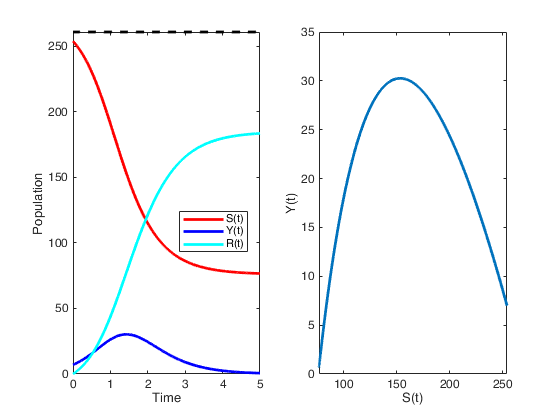

In [1]:
clear; clc; close all

N = 261;         % Size of the population
I0 = 7;          % Initially infected
S0 = N-I0;       % Number of susceptible individuals
lambda = 0.0178; % Transmission coefficient
gamma = 2.73;    % Recovery rate

% We order the variables as y(t) = [S(t),I(t)]
f = @(t,y) [-lambda*y(1)*y(2); lambda*y(1)*y(2)-gamma*y(2)];
[T,Y] = ode45(@(t,y) f(t,y),linspace(0,5,1000),[S0;I0]);

% We plot the three curves on the same graph
figure(1)
subplot(1,2,1)
plot(T,Y(:,1),'r-',...
    T,Y(:,2),'b-',...
    T,N-Y(:,1)-Y(:,2),'c-',...
    T,N*ones(size(T)),'k--','LineWidth',2);
xlabel('Time')
ylabel('Population')
legend({'S(t)','Y(t)','R(t)'},'Location','best')
axis tight
subplot(1,2,2)
plot(Y(:,1),Y(:,2),'LineWidth',2);
xlabel('S(t)');
ylabel('Y(t)');

The parameters in this example have been obtained from the *great plague in Eyam*,
a village near Sheffield in England from 1665-1666 (possibly a secondary outbreak
from the *Great Plague of London*). The Plague was survived only by 83 people of
an original population of 350. Observe that the data here starts from a smaller
population, i.e., we are neglecting the initial insurgence, $S(0) = 254$, $I(0) = 7$.

The infective period of the bubonic plague can be estimated to be around 11 days,
and this gives a value of $\lambda = 0.0178$ and a value of $\beta = 2.73$. To
obtain these values we have used a couple of mathematical observations. If we sum
the two equations for $S'(t)$ and $I'(t)$ we find
```{math}
(S + I)' = - \alpha I < 0,
```
thus this a decreasing positive function, henceforth it has a finite limit, and
since $\lim_{t\rightarrow +\infty} I(t) = 0$, this limit is equal to the total
number of susceptible hosts at the end of the epidemics. By performing some
integrals (out of our scope) one finds that
```{math}
\log \frac{S_0}{S_\infty} = \frac{\lambda}{\gamma} [1 - \frac{S_\infty}{N}] = \mathcal{R}_0 [1 - \frac{S_\infty}{N}],
```
where $\mathcal{R}_0$ is called the basic reproduction number. As you may have
heard lately, then to prevent the occurrence of an epidemic it is then necessary
to reduce $\mathcal{R}_0$ below the threshold of $1$.

As an **exercise** you can try to play around with the parameters of this model
to generate the different outcomes of an epidemic obeying it.